# Predict Home Value of Zillow Listings

**Alec Hartman**

**April 8, 2020**

## Goals
1. Develop a model to predict home values using square feet, bedrooms, and bathrooms
2. Plot distributions of tax rates for each county
3. Create a summary presentation about the drivers of single unit property values

---
### 1. Acquire + Preparation aka Wrangling

In [46]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn
import sklearn.linear_model

import wrangle as wr
import split_scale as ss
import explore as ex
import evaluate as ev

In [2]:
df = wr.wrangle_zillow()
df

,bathrooms,bedrooms,square_feet,fips_code,property_description,tax_value,tax_amount,tax_rate,transaction_date,county
0,2.5,3.0,1653.0,6059,Single Family Residential,605000.0,6185.28,0.010224,2017-05-01,Orange County
1,3.0,3.0,1572.0,6037,Single Family Residential,404060.0,4934.43,0.012212,2017-05-01,Los Angeles County
2,3.0,4.0,3041.0,6037,Single Family Residential,245311.0,2963.65,0.012081,2017-05-01,Los Angeles County
3,2.0,3.0,1692.0,6037,Single Family Residential,649169.0,8063.11,0.012421,2017-05-01,Los Angeles County
4,2.0,4.0,1611.0,6037,Single Family Residential,89640.0,1144.73,0.012770,2017-05-01,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...
15006,3.0,5.0,2526.0,6059,Single Family Residential,458903.0,5718.72,0.012462,2017-06-30,Orange County
15007,3.0,5.0,2735.0,6059,Single Family Residential,115387.0,1465.88,0.012704,2017-06-30,Orange County
15008,2.0,3.0,1536.0,6037,Single Family Residential,297097.0,3519.78,0.011847,2017-06-30,Los Angeles County
15009,3.0,5.0,2655.0,6059,Single Family Residential,746963.0,8065.50,0.010798,2017-06-30,Orange County


In [3]:
df.isnull().sum()

bathrooms               0
bedrooms                0
square_feet             0
fips_code               0
property_description    0
tax_value               0
tax_amount              0
tax_rate                0
transaction_date        0
county                  0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15011 entries, 0 to 15010
Data columns (total 10 columns):
bathrooms               15011 non-null float64
bedrooms                15011 non-null float64
square_feet             15011 non-null float64
fips_code               15011 non-null int64
property_description    15011 non-null object
tax_value               15011 non-null float64
tax_amount              15011 non-null float64
tax_rate                15011 non-null float64
transaction_date        15011 non-null object
county                  15011 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,bathrooms,bedrooms,square_feet,fips_code,tax_value,tax_amount,tax_rate
count,15011.000000,15011.000000,15011.000000,15011.000000,1.501100e+04,15011.000000,15011.000000
mean,2.326161,3.312904,1942.109653,6049.387049,5.413327e+05,6593.327045,0.013431
std,1.021834,0.942635,1001.672617,21.238488,7.306264e+05,8449.893492,0.006881
min,0.000000,0.000000,300.000000,6037.000000,1.050400e+04,51.260000,0.000787
25%,2.000000,3.000000,1275.000000,6037.000000,1.985960e+05,2706.520000,0.011603
50%,2.000000,3.000000,1679.000000,6037.000000,3.848860e+05,4771.470000,0.012305
75%,3.000000,4.000000,2346.000000,6059.000000,6.449440e+05,7678.315000,0.013697
max,11.000000,12.000000,15450.000000,6111.000000,2.385837e+07,276797.830000,0.452884


In [6]:
train, test = ss.split_my_data(df)

In [7]:
train

,bathrooms,bedrooms,square_feet,fips_code,property_description,tax_value,tax_amount,tax_rate,transaction_date,county
1882,2.0,4.0,1640.0,6037,Single Family Residential,219000.0,4150.54,0.018952,2017-05-09,Los Angeles County
6067,2.0,2.0,1237.0,6059,Single Family Residential,456663.0,4753.68,0.010410,2017-05-26,Orange County
11776,4.5,4.0,3453.0,6059,Single Family Residential,1034888.0,10495.00,0.010141,2017-06-21,Orange County
3214,3.0,3.0,1718.0,6037,Single Family Residential,108224.0,2337.83,0.021602,2017-05-15,Los Angeles County
840,2.0,3.0,1529.0,6037,Single Family Residential,424568.0,5729.02,0.013494,2017-05-04,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...
9451,1.0,3.0,1270.0,6037,Single Family Residential,70111.0,1072.24,0.015293,2017-06-12,Los Angeles County
13730,4.0,3.0,3296.0,6037,Single Family Residential,8248250.0,94275.80,0.011430,2017-06-28,Los Angeles County
3264,3.0,3.0,2672.0,6111,Single Family Residential,779860.0,8364.24,0.010725,2017-05-15,Ventura County
399,2.0,3.0,1437.0,6037,Single Family Residential,803000.0,9139.36,0.011382,2017-05-02,Los Angeles County


In [8]:
test

,bathrooms,bedrooms,square_feet,fips_code,property_description,tax_value,tax_amount,tax_rate,transaction_date,county
2706,2.0,3.0,1604.0,6037,Single Family Residential,273633.0,3535.34,0.012920,2017-05-12,Los Angeles County
10705,1.0,2.0,1402.0,6037,Single Family Residential,606062.0,7028.52,0.011597,2017-06-16,Los Angeles County
4434,4.0,4.0,2645.0,6037,Single Family Residential,1305386.0,15890.44,0.012173,2017-05-19,Los Angeles County
12786,2.0,3.0,1680.0,6037,Single Family Residential,101018.0,1181.81,0.011699,2017-06-23,Los Angeles County
8420,2.5,6.0,2628.0,6059,Single Family Residential,398342.0,4654.80,0.011685,2017-06-06,Orange County
...,...,...,...,...,...,...,...,...,...,...
8048,2.0,4.0,1500.0,6059,Single Family Residential,849700.0,9699.50,0.011415,2017-06-05,Orange County
1360,3.5,4.0,4245.0,6059,Single Family Residential,1719850.0,18269.30,0.010623,2017-05-05,Orange County
8191,1.0,2.0,806.0,6037,Single Family Residential,228849.0,2902.28,0.012682,2017-06-06,Los Angeles County
14080,1.0,2.0,1006.0,6037,Single Family Residential,186210.0,2296.08,0.012331,2017-06-29,Los Angeles County


In [9]:
train.shape[0] / df.shape[0]

0.7999467057491173

In [10]:
test.shape[0] / df.shape[0]

0.2000532942508827

---
### 2. Explore

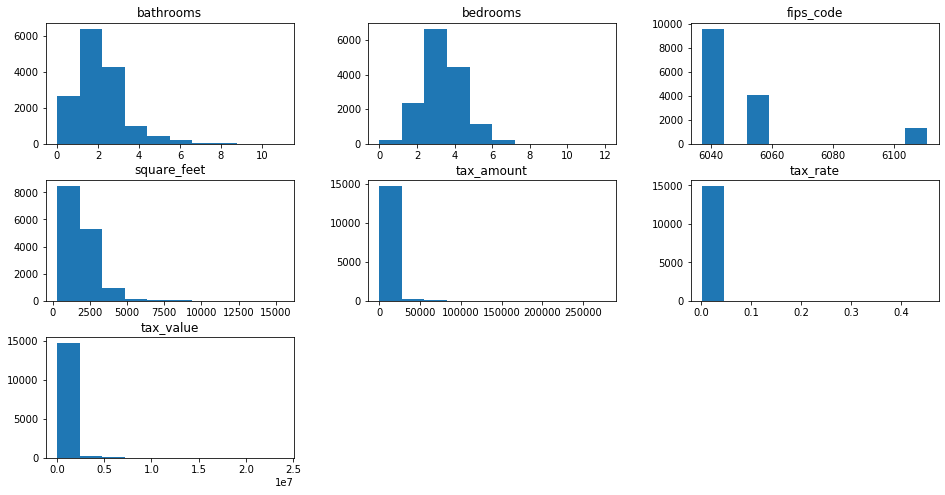

In [11]:
df.hist(grid=False, figsize=(16, 8))
plt.show()

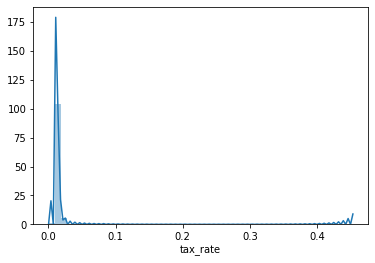

In [12]:
# plt.figure(figsize=(16, 8))
sns.distplot(df.tax_rate)
plt.show()

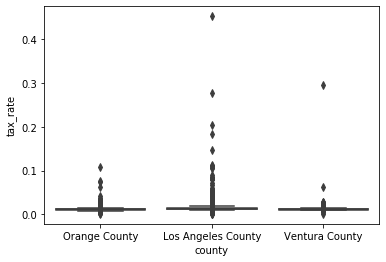

In [13]:
# plt.figure(figsize=(16, 8))
sns.boxplot(x=df.county, y=df.tax_rate)
plt.show()

---
### 3. Model

### Hypotheses

$H_0$: Single unit property value is independent of square footage, number of bedrooms, and number of bathrooms

$H_a$: Single unit property value is dependent on square footage, number of bedrooms, and number of bathrooms

In [14]:
train = train[["square_feet", "bedrooms", "bathrooms", "tax_value"]]
test = test[["square_feet", "bedrooms", "bathrooms", "tax_value"]]

In [15]:
train

,square_feet,bedrooms,bathrooms,tax_value
1882,1640.0,4.0,2.0,219000.0
6067,1237.0,2.0,2.0,456663.0
11776,3453.0,4.0,4.5,1034888.0
3214,1718.0,3.0,3.0,108224.0
840,1529.0,3.0,2.0,424568.0
...,...,...,...,...
9451,1270.0,3.0,1.0,70111.0
13730,3296.0,3.0,4.0,8248250.0
3264,2672.0,3.0,3.0,779860.0
399,1437.0,3.0,2.0,803000.0


In [16]:
test

,square_feet,bedrooms,bathrooms,tax_value
2706,1604.0,3.0,2.0,273633.0
10705,1402.0,2.0,1.0,606062.0
4434,2645.0,4.0,4.0,1305386.0
12786,1680.0,3.0,2.0,101018.0
8420,2628.0,6.0,2.5,398342.0
...,...,...,...,...
8048,1500.0,4.0,2.0,849700.0
1360,4245.0,4.0,3.5,1719850.0
8191,806.0,2.0,1.0,228849.0
14080,1006.0,2.0,1.0,186210.0


In [17]:
train.tax_value.mean(), train.tax_value.median()

(542922.0866089273, 387165.5)

In [34]:
predictions = pd.DataFrame({
    "actual_tax_value": train.tax_value,
    "baseline_tax_value": train.tax_value.mean()
})
predictions

,actual_tax_value,baseline_tax_value
1882,219000.000,542922.087
6067,456663.000,542922.087
11776,1034888.000,542922.087
3214,108224.000,542922.087
840,424568.000,542922.087
...,...,...
9451,70111.000,542922.087
13730,8248250.000,542922.087
3264,779860.000,542922.087
399,803000.000,542922.087


>Consider using median value of train dataset because the mean seems to be heavily influenced by the outliers.

In [25]:
pd.options.display.float_format = '{:.3f}'.format

In [35]:
# feature
X = train[["square_feet"]]
# target
y = train.tax_value

# 1. Make the model
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the model
lm.fit(X, y)
# 3. Use the model
predictions["tax_value ~ square_feet"] = lm.predict(X)
predictions

,actual_tax_value,baseline_tax_value,tax_value ~ square_feet
1882,219000.000,542922.087,407730.770
6067,456663.000,542922.087,230053.926
11776,1034888.000,542922.087,1207056.124
3214,108224.000,542922.087,442119.837
840,424568.000,542922.087,358792.483
...,...,...,...
9451,70111.000,542922.087,244603.147
13730,8248250.000,542922.087,1137837.106
3264,779860.000,542922.087,862724.573
399,803000.000,542922.087,318231.020


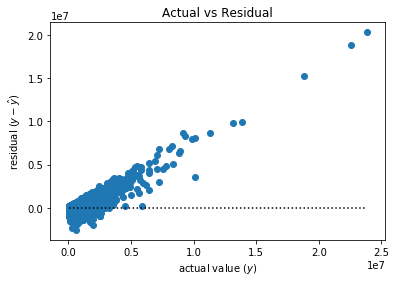

In [44]:
ev.plot_residuals(predictions.actual_tax_value, predictions["tax_value ~ square_feet"])
plt.show()

In [37]:
ev.regression_errors(predictions.actual_tax_value, predictions["tax_value ~ square_feet"], predictions)

SSE    4334227411424934.000
ESS    2340964253010695.000
TSS    6675191664435629.000
MSE        360944987626.993
RMSE             600786.974
dtype: float64

In [39]:
ev.baseline_mean_errors(predictions.actual_tax_value, predictions.baseline_tax_value, predictions)

SSE_baseline    6675191664435648.000
MSE_baseline        555895375119.558
RMSE_baseline             745583.916
dtype: float64

In [41]:
ev.better_than_baseline(predictions.actual_tax_value, predictions["tax_value ~ square_feet"], predictions.baseline_tax_value, predictions)

True

In [49]:
# feature
X = train[["bedrooms"]]
# target
y = train.tax_value

# 1. Make the model
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the model
lm.fit(X, y)
# 3. Use the model
predictions["tax_value ~ bedrooms"] = lm.predict(X)
predictions

,actual_tax_value,baseline_tax_value,tax_value ~ square_feet,tax_value ~ bedrooms
1882,219000.000,542922.087,407730.770,690140.043
6067,456663.000,542922.087,230053.926,259601.022
11776,1034888.000,542922.087,1207056.124,690140.043
3214,108224.000,542922.087,442119.837,474870.532
840,424568.000,542922.087,358792.483,474870.532
...,...,...,...,...
9451,70111.000,542922.087,244603.147,474870.532
13730,8248250.000,542922.087,1137837.106,474870.532
3264,779860.000,542922.087,862724.573,474870.532
399,803000.000,542922.087,318231.020,474870.532


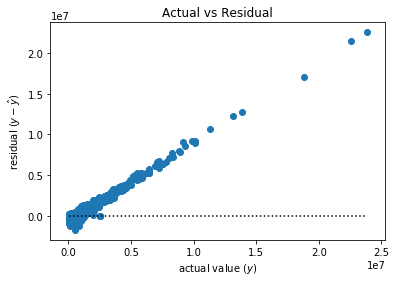

In [51]:
ev.plot_residuals(predictions.actual_tax_value, predictions["tax_value ~ bedrooms"])
plt.show()

In [28]:
# feature
X = train[["bathrooms"]]
# target
y = train.tax_value

# 1. Make the model
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the model
lm.fit(X, y)
# 3. Use the model
predictions["tax_value ~ bathrooms"] = lm.predict(X)
predictions

,actual_tax_value,baseline_tax_value,tax_value ~ square_feet,tax_value ~ bedrooms,tax_value ~ bathrooms
1882,219000.000,387165.500,407730.770,690140.043,421923.220
6067,456663.000,387165.500,230053.926,259601.022,421923.220
11776,1034888.000,387165.500,1207056.124,690140.043,1339076.602
3214,108224.000,387165.500,442119.837,474870.532,788784.573
840,424568.000,387165.500,358792.483,474870.532,421923.220
...,...,...,...,...,...
9451,70111.000,387165.500,244603.147,474870.532,55061.867
13730,8248250.000,387165.500,1137837.106,474870.532,1155645.926
3264,779860.000,387165.500,862724.573,474870.532,788784.573
399,803000.000,387165.500,318231.020,474870.532,421923.220


In [ ]:
# feature
X = train[["square_feet", "bedrooms", "bathrooms"]]
# target
y = train.tax_value

# 1. Make the model
lm = sklearn.linear_model.LinearRegression()
# 2. Fit the model
lm.fit(X, y)
# 3. Use the model
predictions["tax_value ~ square_feet + bedrooms + bedrooms"] = lm.predict(X)
predictions